In [1]:
#initializing parameters

In [9]:
import numpy as np

num_articles = 10  # taking an example of 10 articles
num_features = 3   # contextual features we can consider time_of_day, user_age_group, device_type

views = np.zeros(num_articles)         # to count views for each article
clicks = np.zeros(num_articles)        # taking the reward as time spent per article
total_views = 0                        # total views across all articles

# initializing random context matrix for each article
np.random.seed(0)
context_matrix = np.random.rand(num_articles, num_features)


In [10]:
def select_article_ucb(total_views, views, clicks, context_matrix, user_context, confidence_level=2):
    #now to select the article with the highest contextual UCB value
    article_selected = 0
    max_ucb = 0
    
    for i in range(num_articles):
        if views[i] > 0:
            # average reward for this article
            avg_reward = clicks[i] / views[i]
            
            # to calculate context relevance taking dot product between article context and user context
            context_relevance = np.dot(context_matrix[i], user_context)
            
            # adjusting confidence interval based on context relevance
            confidence_interval = confidence_level * np.sqrt(np.log(total_views) / views[i]) * context_relevance
            ucb = avg_reward + confidence_interval
        else:
            # we will assign a high UCB value to unexplored articles
            ucb = float('inf')
        
        # now select the article with the maximum UCB
        if ucb > max_ucb:
            max_ucb = ucb
            article_selected = i
            
    return article_selected


In [11]:
import random

def get_user_context():
    #simulating user context for each recommendation
    # time_of_day ( 0 for night, 1 for day), age_group (0 for young, 1 for older), device_type ( 0 for mobile, 1 for desktop)
    time_of_day = random.random()  
    user_age_group = random.random() 
    device_type = random.random()  
    return np.array([time_of_day, user_age_group, device_type])

def simulate_user_interaction(article, user_context, context_matrix):
    #simulating the reward (time spent) based on context relevance
    # context relevance adjustment = higher time spent if user context aligns well with article context
    relevance_score = np.dot(context_matrix[article], user_context)
    base_time_spent = random.uniform(0, 100)
    return base_time_spent * relevance_score  


In [12]:
num_rounds = 1000  # no. of recommendations
total_rewards = 0

for round in range(num_rounds):
    # current user context
    user_context = get_user_context()
    
    # selecting an article based on UCB with context
    article_selected = select_article_ucb(total_views, views, clicks, context_matrix, user_context)
    
    # simulating user interaction and get reward (time spent) with contextual relevance
    reward = simulate_user_interaction(article_selected, user_context, context_matrix)
    
    # updating views and clicks (rewards)
    views[article_selected] += 1
    clicks[article_selected] += reward
    total_views += 1
    total_rewards += reward
    
    print(f"Round {round + 1}: Selected Article = {article_selected}, Reward = {reward:.2f}")


Round 1: Selected Article = 0, Reward = 42.40
Round 2: Selected Article = 1, Reward = 10.85
Round 3: Selected Article = 2, Reward = 9.26
Round 4: Selected Article = 3, Reward = 31.54
Round 5: Selected Article = 4, Reward = 100.78
Round 6: Selected Article = 5, Reward = 56.53
Round 7: Selected Article = 6, Reward = 123.54
Round 8: Selected Article = 7, Reward = 137.18
Round 9: Selected Article = 8, Reward = 0.04
Round 10: Selected Article = 9, Reward = 24.24
Round 11: Selected Article = 7, Reward = 124.77
Round 12: Selected Article = 7, Reward = 1.33
Round 13: Selected Article = 6, Reward = 132.63
Round 14: Selected Article = 6, Reward = 50.55
Round 15: Selected Article = 6, Reward = 9.66
Round 16: Selected Article = 4, Reward = 10.16
Round 17: Selected Article = 7, Reward = 32.84
Round 18: Selected Article = 6, Reward = 30.99
Round 19: Selected Article = 7, Reward = 7.14
Round 20: Selected Article = 6, Reward = 139.84
Round 21: Selected Article = 6, Reward = 14.57
Round 22: Selected Ar

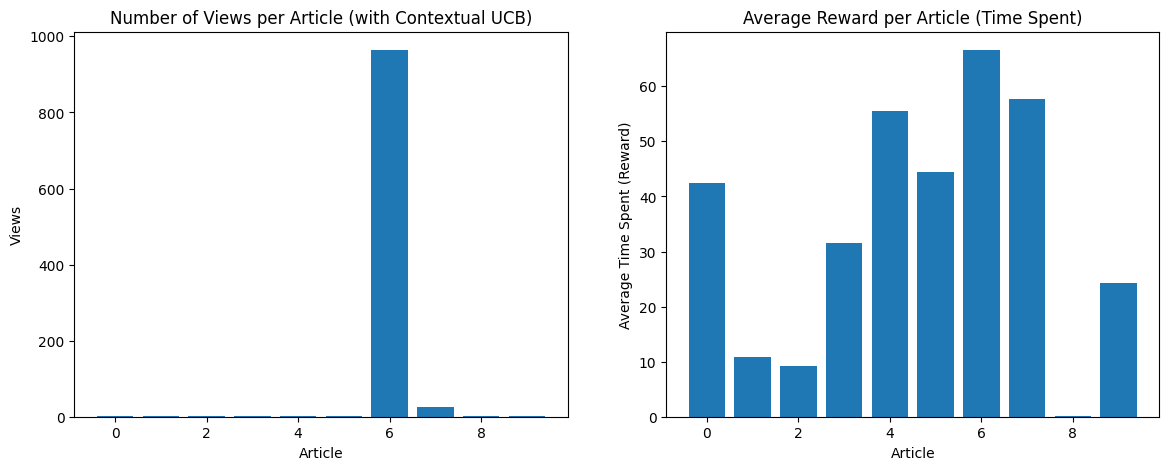

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.bar(range(num_articles), views)
plt.title("Number of Views per Article (with Contextual UCB)")
plt.xlabel("Article")
plt.ylabel("Views")

plt.subplot(1, 2, 2)
avg_rewards = clicks / np.maximum(views, 1)  
plt.bar(range(num_articles), avg_rewards)
plt.title("Average Reward per Article (Time Spent)")
plt.xlabel("Article")
plt.ylabel("Average Time Spent (Reward)")

plt.show()
